# Dataset

https://www.datos.gov.co/Educaci-n/Saber-11-2019-2/ynam-yc42/about_data

Resultados anonimizados de las pruebas de Saber 11 del segundo semestre del año 2019-2

# Objetivo

Predecir los resultados de las pruebas a partir de los datos del estudiente y su familia, utilizando modelos de regresión

# Importación de librerias

In [1]:
import pandas as pd
import numpy as np

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns', None)

# Carga del dataset

In [4]:
df = pd.read_csv("data/Saber_11__2019-2_20240510.csv", low_memory=False)
df.head(5)

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_TIENEETNIA,ESTU_PAIS_RESIDE,ESTU_ETNIA,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,ESTU_COD_RESIDE_MCPIO,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_CODIGO_ICFES,COLE_COD_DANE_ESTABLECIMIENTO,COLE_NOMBRE_ESTABLECIMIENTO,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_COD_DANE_SEDE,COLE_NOMBRE_SEDE,COLE_SEDE_PRINCIPAL,COLE_AREA_UBICACION,COLE_JORNADA,COLE_COD_MCPIO_UBICACION,COLE_MCPIO_UBICACION,COLE_COD_DEPTO_UBICACION,COLE_DEPTO_UBICACION,ESTU_PRIVADO_LIBERTAD,ESTU_COD_MCPIO_PRESENTACION,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,ESTU_COD_DEPTO_PRESENTACION,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
0,TI,COLOMBIA,M,02/18/2002 12:00:00 AM,20194,SB11201940031558,ESTUDIANTE,No,COLOMBIA,-,MAGDALENA,47,SANTA ANA,47707,Estrato 3,5 a 6,Cinco,Educación profesional completa,Secundaria (Bachillerato) completa,No aplica,"Trabaja en el hogar, no trabaja o estudia",Si,Si,No,Si,Si,No,No,No,MÁS DE 100 LIBROS,1 o 2 veces por semana,3 a 5 veces por semana,Nunca o rara vez comemos eso,Peor,Entre 30 y 60 minutos,Entre 30 y 60 minutos,Menos de 10 horas,"Si, en efectivo",39008,147707000156,INSTITUCION EDUCATIVA DEPARTAMENTAL ANTONIO BR...,MIXTO,OFICIAL,A,N,TÉCNICO/ACADÉMICO,147707000156,COL DPTAL ANTONIO BRUGES CARMONA,S,URBANO,MAÑANA,47707,SANTA ANA,47,MAGDALENA,N,47707,SANTA ANA,MAGDALENA,47,47,33,2,48,42,2,37,15,1,30,8,1,54.0,67,A1,208,25,50.9421557404314,2,2.0,PUBLICAR,NO
1,TI,COLOMBIA,M,06/28/2003 12:00:00 AM,20194,SB11201940303339,ESTUDIANTE,No,COLOMBIA,-,BOGOTÁ,11,BOGOTÁ D.C.,11001,Estrato 3,9 o más,Tres,Técnica o tecnológica completa,Técnica o tecnológica completa,Trabaja por cuenta propia (por ejemplo plomero...,Es dueño de un negocio pequeño (tiene pocos em...,Si,Si,Si,Si,Si,Si,No,No,MÁS DE 100 LIBROS,Todos o casi todos los días,3 a 5 veces por semana,1 o 2 veces por semana,Mejor,Entre 30 y 60 minutos,Entre 30 y 60 minutos,Menos de 10 horas,"Si, en efectivo",128611,311001105383,GIMN SAN ANGELO,MIXTO,NO OFICIAL,A,-,ACADÉMICO,311001105383,GIMN SAN ANGELO,S,URBANO,COMPLETA,11001,BOGOTÁ D.C.,11,BOGOTÁ,N,11001,BOGOTÁ D.C.,BOGOTÁ,11,60,76,3,65,88,3,54,71,2,59,83,3,63.0,88,A2,299,83,59.767864431576,3,4.0,PUBLICAR,NO
2,TI,COLOMBIA,M,06/02/2001 12:00:00 AM,20194,SB11201940255017,ESTUDIANTE,No,COLOMBIA,-,BOLIVAR,13,CARTAGENA DE INDIAS,13001,Estrato 1,5 a 6,Dos,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Es vendedor o trabaja en atención al público,Es vendedor o trabaja en atención al público,No,Si,No,Si,No,No,No,No,26 A 100 LIBROS,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,Entre 30 y 60 minutos,Más de 3 horas,0,"Si, en efectivo",35493,113001001719,INSTITUCION EDUCATIVA PROMOCION SOCIAL DE C/GENA.,MIXTO,OFICIAL,A,N,TÉCNICO/ACADÉMICO,113001001719,INSTITUCION EDUCATIVA PROMOCION SOCIAL DE C/GENA.,S,URBANO,MAÑANA,13001,CARTAGENA DE INDIAS,13,BOLIVAR,N,13001,CARTAGENA DE INDIAS,BOLIVAR,13,66,91,4,57,70,3,41,29,2,74,99,4,64.0,89,A2,299

# Variables Globales

Empezamos con la definicion de una lista de columnas que luego usaremos para eliminar las columnas Inecesarias y ademas definimos una lista de columnas que por las cuales deberemos filtrar para evitar posibles valores atipicos

In [5]:
# lista de columnas que se eliminaran
drop_cols =[
]

# Arreglo con los filtros que se deben aplicar para eliminar datos atipicos
filters = {}


# Análisis de Columnas

## Columnas de texto

In [6]:
# listamos todas las columnas de texto
text_cols = df.select_dtypes(include = ["object", 'category']).columns.tolist()
estu_text_cols = list(filter(lambda x: 'ESTU' in x, text_cols )) # Columnas con información del estudiante
fami_text_Cols = list(filter(lambda x: 'FAMI' in x, text_cols )) # Columnas con información de la familia del estudiante
cole_text_Cols = list(filter(lambda x: 'COLE' in x, text_cols )) # Columnas con información del colegio del estudiante
restante_texto_cols = list(filter(lambda x: not 'ESTU' in x and not 'FAMI' in x and not 'COLE' in x, text_cols))

### Analizar columnas de texto de Estu

In [7]:
estu_text_cols

['ESTU_TIPODOCUMENTO',
 'ESTU_NACIONALIDAD',
 'ESTU_GENERO',
 'ESTU_FECHANACIMIENTO',
 'ESTU_CONSECUTIVO',
 'ESTU_ESTUDIANTE',
 'ESTU_TIENEETNIA',
 'ESTU_PAIS_RESIDE',
 'ESTU_ETNIA',
 'ESTU_DEPTO_RESIDE',
 'ESTU_COD_RESIDE_DEPTO',
 'ESTU_MCPIO_RESIDE',
 'ESTU_COD_RESIDE_MCPIO',
 'ESTU_DEDICACIONLECTURADIARIA',
 'ESTU_DEDICACIONINTERNET',
 'ESTU_HORASSEMANATRABAJA',
 'ESTU_TIPOREMUNERACION',
 'ESTU_PRIVADO_LIBERTAD',
 'ESTU_MCPIO_PRESENTACION',
 'ESTU_DEPTO_PRESENTACION',
 'ESTU_INSE_INDIVIDUAL',
 'ESTU_NSE_INDIVIDUAL',
 'ESTU_ESTADOINVESTIGACION',
 'ESTU_GENERACION-E']

In [8]:
df[estu_text_cols].head()

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_TIENEETNIA,ESTU_PAIS_RESIDE,ESTU_ETNIA,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,ESTU_COD_RESIDE_MCPIO,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,ESTU_PRIVADO_LIBERTAD,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
0,TI,COLOMBIA,M,02/18/2002 12:00:00 AM,SB11201940031558,ESTUDIANTE,No,COLOMBIA,-,MAGDALENA,47,SANTA ANA,47707,Entre 30 y 60 minutos,Entre 30 y 60 minutos,Menos de 10 horas,"Si, en efectivo",N,SANTA ANA,MAGDALENA,50.9421557404314,2,PUBLICAR,NO
1,TI,COLOMBIA,M,06/28/2003 12:00:00 AM,SB11201940303339,ESTUDIANTE,No,COLOMBIA,-,BOGOTÁ,11,BOGOTÁ D.C.,11001,Entre 30 y 60 minutos,Entre 30 y 60 minutos,Menos de 10 horas,"Si, en efectivo",N,BOGOTÁ D.C.,BOGOTÁ,59.767864431576,3,PUBLICAR,NO
2,TI,COLOMBIA,M,06/02/2001 12:00:00 AM,SB11201940255017,ESTUDIANTE,No,COLOMBIA,-,BOLIVAR,13,CARTAGENA DE INDIAS,13001,Entre 30 y 60 minutos,Más de 3 horas,0,"Si, en efectivo",N,CARTAGENA DE INDIAS,BOLIVAR,50.7642383644749,2,PUBLICAR,GENERACION E - GRATUIDAD
3,TI,COLOMBIA,M,04/26/2002 12:00:00 AM,SB11201940154799,ESTUDIANTE,Si,COLOMBIA,Ninguno,BOGOTÁ,11,BOGOTÁ D.C.,11001,30 minutos o menos,Entre 30 y 60 minutos,Más de 30 horas,"Si, en efectivo",N,BOGOTÁ D.C.,BOGOTÁ,45.7791353123516,2,PUBLICAR,GENERACION E - GRATUIDAD
4,TI,COLOMBIA,M,02/05/2002 12:00:00 AM,SB11201940280831,ESTUDIANTE,No,COLOMBIA,-,BOGOTÁ,11,BOGOTÁ D.C.,11001,No leo por entretenimiento,Más de 3 horas,Más de 30 horas,No,N,BOGOTÁ D.C.,BOGOTÁ,52.9109464277177,3,PUBLICAR,NO


In [9]:
df[estu_text_cols].describe()

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_TIENEETNIA,ESTU_PAIS_RESIDE,ESTU_ETNIA,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,ESTU_COD_RESIDE_MCPIO,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,ESTU_PRIVADO_LIBERTAD,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
count,546212,546212,546212,546212,546212,546212,546212,546212,546212,545835,546212,545835,546212,545585,515914,545831,530704,546212,546212,546212,546208,529171,546212,546212
unique,10,33,3,11663,546212,1,3,33,21,34,35,1031,1115,6,6,6,5,2,472,33,469865,5,3,4
top,TI,COLOMBIA,F,01/01/1900 12:00:00 AM,SB11201940031558,ESTUDIANTE,No,COLOMBIA,-,BOGOTÁ,11,BOGOTÁ D.C.,11001,30 minutos o menos,Entre 1 y 3 horas,0,No,N,BOGOTÁ D.C.,BOGOTÁ,-,2,PUBLICAR,GENERACION E - GRATUIDAD
freq,445780,544918,295994,1826,1,546212,506074,544918,506203,83600,83600,83600,83600,199094,157557,354503,377436,546086,84122,84122,17041,197566,545755,297357


In [10]:
df["ESTU_NSE_INDIVIDUAL"].unique()

array(['2', '3', '4', nan, '1', '-'], dtype=object)

In [11]:
df["ESTU_ESTADOINVESTIGACION"].unique()

array(['PUBLICAR', 'NO SE COMPROBO IDENTIDAD DEL EXAMINADO',
       'VALIDEZ OFICINA JURÍDICA'], dtype=object)

In [12]:
df["ESTU_GENERACION-E"].unique()

array(['NO', 'GENERACION E - GRATUIDAD',
       'GENERACION E - EXCELENCIA NACIONAL',
       'GENERACION E - EXCELENCIA DEPARTAMENTAL'], dtype=object)

In [13]:
drop_cols += [
    "ESTU_TIPODOCUMENTO", #No relevante para el objetivo
    "ESTU_NACIONALIDAD", # filtra por esta columna pendiente
    "ESTU_FECHANACIMIENTO",#No relevante para el objetivo
    "ESTU_CONSECUTIVO", #No relevante para el objetivo, valores unicos
    "ESTU_ESTUDIANTE", #Todas las filas iguales
    "ESTU_TIENEETNIA", #No relevante para el objetivo
    "ESTU_ETNIA", # filtrar por esta columna
    "ESTU_COD_RESIDE_DEPTO", #Nos queamos con la columna de TEXTO del DEPTO
    "ESTU_COD_RESIDE_MCPIO", #Nos queamos con la columna de TEXTO del MCPIO
    "ESTU_PRIVADO_LIBERTAD", #filtrar por esta columna 
    "ESTU_NSE_INDIVIDUAL", #No relevante para el objetivo
    "ESTU_ESTADOINVESTIGACION", #debemos filtrar por esta columna 
    "ESTU_GENERACION-E", #No relevante para el objetivo
    "ESTU_PAIS_RESIDE", #No revelante, todos van a ser de COLOMBIA
    "ESTU_DEPTO_PRESENTACION", #No relevante para el objetivo
    "ESTU_MCPIO_PRESENTACION", #No relevante para el objetivo
    "ESTU_INSE_INDIVIDUAL", #No sabemos lo que representa esta variable
    "ESTU_MCPIO_RESIDE" #son mas de 900 municipios despues de un one hot encodig el dataset quedaria muy ancho
]

filters.update(
    {
        "ESTU_NACIONALIDAD": "COLOMBIA", # No tomamos las pruebas realizadas por extrangeros
        "ESTU_TIENEETNIA": "No",   # No tomamos a los estudiantes que especificaron su identidad dado que son muy pocos y quedaria desbalanceado
        "ESTU_PRIVADO_LIBERTAD": "N" # Los estudiantes provados de la libertad eran muy pocos y podrian representar valores atipicos
    }
)

### Analizar columnas de texto de Fami

In [14]:
fami_text_Cols

['FAMI_ESTRATOVIVIENDA',
 'FAMI_PERSONASHOGAR',
 'FAMI_CUARTOSHOGAR',
 'FAMI_EDUCACIONPADRE',
 'FAMI_EDUCACIONMADRE',
 'FAMI_TRABAJOLABORPADRE',
 'FAMI_TRABAJOLABORMADRE',
 'FAMI_TIENEINTERNET',
 'FAMI_TIENESERVICIOTV',
 'FAMI_TIENECOMPUTADOR',
 'FAMI_TIENELAVADORA',
 'FAMI_TIENEHORNOMICROOGAS',
 'FAMI_TIENEAUTOMOVIL',
 'FAMI_TIENEMOTOCICLETA',
 'FAMI_TIENECONSOLAVIDEOJUEGOS',
 'FAMI_NUMLIBROS',
 'FAMI_COMELECHEDERIVADOS',
 'FAMI_COMECARNEPESCADOHUEVO',
 'FAMI_COMECEREALFRUTOSLEGUMBRE',
 'FAMI_SITUACIONECONOMICA']

In [15]:
df[fami_text_Cols].head()

,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA
0,Estrato 3,5 a 6,Cinco,Educación profesional completa,Secundaria (Bachillerato) completa,No aplica,"Trabaja en el hogar, no trabaja o estudia",Si,Si,No,Si,Si,No,No,No,MÁS DE 100 LIBROS,1 o 2 veces por semana,3 a 5 veces por semana,Nunca o rara vez comemos eso,Peor
1,Estrato 3,9 o más,Tres,Técnica o tecnológica completa,Técnica o tecnológica completa,Trabaja por cuenta propia (por ejemplo plomero...,Es dueño de un negocio pequeño (tiene pocos em...,Si,Si,Si,Si,Si,Si,No,No,MÁS DE 100 LIBROS,Todos o casi todos los días,3 a 5 veces por semana,1 o 2 veces por semana,Mejor
2,Estrato 1,5 a 6,Dos,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Es vendedor o trabaja en atención al público,Es vendedor o trabaja en atención al público,No,Si,No,Si,No,No,No,No,26 A 100 LIBROS,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual
3,Estrato 3,3 a 4,Dos,Primaria incompleta,Secundaria (Bachillerato) completa,No aplica,Es dueño de un negocio pequeño (tiene pocos em...,No,No,Si,No,No,No,No,No,11 A 25 LIBROS,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual
4,Estrato 3,3 a 4,Cuatro,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,"Trabaja en el hogar, no trabaja o estudia","Trabaja en el hogar, no trabaja o estudia",Si,Si,Si,Si,Si,No,No,No,26 A 100 LIBROS,Todos o casi todos los días,Nunca o rara vez comemos eso,Todos o casi todos los días,Mejor


In [16]:
df[fami_text_Cols].describe()

,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA
count,546186,537749,539794,537920,525253,538081,538743,537875,523932,538027,538569,537582,538006,537395,538487,537558,523907,536587,523880,537953
unique,8,6,7,13,13,14,14,3,3,3,3,3,3,3,3,5,5,5,5,4
top,Estrato 2,3 a 4,Tres,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,"Es agricultor, pesquero o jornalero","Trabaja en el hogar, no trabaja o estudia",Si,Si,Si,Si,No,No,No,No,0 A 10 LIBROS,1 o 2 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual
freq,188314,257604,207232,117488,136286,78187,213377,314042,391419,295409,405542,280967,401388,308054,410475,207526,170538,209228,198491,322524


In [17]:
df["FAMI_SITUACIONECONOMICA"].unique()

array(['Peor', 'Mejor', 'Igual', '-', nan], dtype=object)

In [18]:
drop_cols+=[
    "FAMI_CUARTOSHOGAR", #No relevante para el objetivo
    "FAMI_TIENELAVADORA", #No relevante para el objetivo
    "FAMI_TIENEHORNOMICROOGAS", #No relevante para el objetivo
    "FAMI_TIENEAUTOMOVIL", #No relevante para el objetivo
    "FAMI_TIENEMOTOCICLETA", #No relevante para el objetivo
    "FAMI_TIENECONSOLAVIDEOJUEGOS" #No relevante para el objetivo
]


### Analizar columnas de texto de Cole

In [19]:
df[cole_text_Cols].head()

,COLE_NOMBRE_ESTABLECIMIENTO,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_NOMBRE_SEDE,COLE_SEDE_PRINCIPAL,COLE_AREA_UBICACION,COLE_JORNADA,COLE_MCPIO_UBICACION,COLE_DEPTO_UBICACION
0,INSTITUCION EDUCATIVA DEPARTAMENTAL ANTONIO BR...,MIXTO,OFICIAL,A,N,TÉCNICO/ACADÉMICO,COL DPTAL ANTONIO BRUGES CARMONA,S,URBANO,MAÑANA,SANTA ANA,MAGDALENA
1,GIMN SAN ANGELO,MIXTO,NO OFICIAL,A,-,ACADÉMICO,GIMN SAN ANGELO,S,URBANO,COMPLETA,BOGOTÁ D.C.,BOGOTÁ
2,INSTITUCION EDUCATIVA PROMOCION SOCIAL DE C/GENA.,MIXTO,OFICIAL,A,N,TÉCNICO/ACADÉMICO,INSTITUCION EDUCATIVA PROMOCION SOCIAL DE C/GENA.,S,URBANO,MAÑANA,CARTAGENA DE INDIAS,BOLIVAR
3,COLEGIO VIRGINIA GUTIERREZ DE PINEDA (IED),MIXTO,OFICIAL,A,-,ACADÉMICO,COL VIRGINIA GUTIERREZ DE PINEDA (INS EDUC DIST),S,URBANO,MAÑANA,BOGOTÁ D.C.,BOGOTÁ
4,COLEGIO PALERMO IEDIP (IED),MIXTO,OFICIAL,A,N,TÉCNICO/ACADÉMICO,CENT EDUC DIST PALERMO CEDIP,S,URBANO,MAÑANA,BOGOTÁ D.C.,BOGOTÁ


In [20]:
df[cole_text_Cols].describe()

,COLE_NOMBRE_ESTABLECIMIENTO,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_NOMBRE_SEDE,COLE_SEDE_PRINCIPAL,COLE_AREA_UBICACION,COLE_JORNADA,COLE_MCPIO_UBICACION,COLE_DEPTO_UBICACION
count,546212,546212,546212,546212,546212,532464,546212,546212,546212,546212,546212,546212
unique,9372,3,2,3,3,5,10284,2,2,6,1030,33
top,INSTITUCION EDUCATIVA FRANCISCO JOSE DE CALDAS,MIXTO,OFICIAL,A,N,ACADÉMICO,INSTITUTO TECNICO INDUSTRIAL,S,URBANO,MAÑANA,BOGOTÁ D.C.,BOGOTÁ
freq,1147,528780,416011,541901,453280,284200,881,523322,460467,257060,82832,82832


In [21]:
df["COLE_NATURALEZA"].unique()

array(['OFICIAL', 'NO OFICIAL'], dtype=object)

In [22]:
df["COLE_CARACTER"].unique()

array(['TÉCNICO/ACADÉMICO', 'ACADÉMICO', nan, 'TÉCNICO', 'NO APLICA', '-'],
      dtype=object)

In [23]:
df["COLE_JORNADA"].unique()

array(['MAÑANA', 'COMPLETA', 'NOCHE', 'UNICA', 'TARDE', 'SABATINA'],
      dtype=object)

In [24]:
drop_cols+=[
    "COLE_NOMBRE_ESTABLECIMIENTO", #valores unicos
    "COLE_GENERO",          #filtrar por mixto categoria dominante
    "COLE_NATURALEZA",
    "COLE_CALENDARIO",      #filtramos A
    "COLE_BILINGUE",        #No relevante para el objetivo
    "COLE_CARACTER",        #No relevante para el objetivo
    "COLE_NOMBRE_SEDE",     #No relevante para el objetivo valores unicos}
    "COLE_SEDE_PRINCIPAL",  #No relevante para el objetivo 
    "COLE_MCPIO_UBICACION", #No relevante para el objetivo ya tango esta info del estudiante
    "COLE_DEPTO_UBICACION", #No relevante para el objetivo ya tango esta info del estudiante
    "COLE_AREA_UBICACION",
    "COLE_JORNADA"
    
]

filters.update(
    {
        "COLE_GENERO": "MIXTO",  # Esta variable categoria esta muy desvalanceada y escoger solo los colegios mixtos no afecta mucho el numero de registros
        "COLE_CALENDARIO": "A",   # Esta variable categoria esta muy desvalanceada y escoger solo los collegios con calendario A no afecta mucho el numero de registros
        "COLE_AREA_UBICACION": "URBANO" # Esta variable categoria esta muy desvalanceada y escoger solo los colegios urbanos no afecta mucho el numero de registros
    }
)

### Analizar columnas de texto de Restantes

In [25]:
df[restante_texto_cols].head()

,DESEMP_INGLES,PERCENTIL_GLOBAL
0,A1,25
1,A2,83
2,A2,84
3,A1,88
4,A1,78


In [26]:
df[restante_texto_cols].describe()

,DESEMP_INGLES,PERCENTIL_GLOBAL
count,546212,546212
unique,5,101
top,A-,22
freq,271183,6443


In [27]:
df['DESEMP_INGLES'].unique()

array(['A1', 'A2', 'A-', 'B1', 'B+'], dtype=object)

In [28]:
df['PERCENTIL_GLOBAL'].unique()

array(['25', '83', '84', '88', '78', '19', '99', '89', '95', '13', '5',
       '85', '74', '33', '67', '91', '64', '43', '46', '80', '49', '63',
       '6', '98', '72', '45', '20', '27', '57', '59', '60', '65', '2',
       '75', '9', '86', '92', '55', '81', '38', '76', '28', '41', '22',
       '97', '51', '61', '94', '90', '96', '15', '21', '62', '39', '87',
       '18', '79', '31', '42', '82', '7', '3', '71', '35', '37', '17',
       '26', '12', '16', '93', '24', '73', '48', '30', '58', '50', '56',
       '77', '11', '40', '66', '36', '52', '10', '47', '1', '4', '53',
       '8', '29', '14', '34', '70', '100', '54', '32', '68', '23', '44',
       '69', '-'], dtype=object)

In [29]:
drop_cols+=[
    "DESEMP_INGLES", #No relevante para el objetivo
    "PERCENTIL_GLOBAL" #No relevante para el objetivo
]

## Columnas Numericas

In [30]:
# listamos todas las columnas de numeros
num_cols=df.select_dtypes(include = ['float64','int32','int64']).columns.tolist()
estu_num_cols = list(filter(lambda x: 'ESTU' in x, num_cols))
fami_num_Cols = list(filter(lambda x: 'FAMI' in x, num_cols))
cole_num_Cols = list(filter(lambda x: 'COLE' in x, num_cols)) # Columnas con información del colegio del estudiante
restante_num_cols = list(filter(lambda x: not 'ESTU' in x and not 'FAMI' in x and not 'COLE' in x, num_cols))

### Analizar columnas de numericas de Estu

In [31]:
estu_num_cols

['ESTU_COD_MCPIO_PRESENTACION',
 'ESTU_COD_DEPTO_PRESENTACION',
 'ESTU_NSE_ESTABLECIMIENTO']

In [32]:
df[estu_num_cols].head()

,ESTU_COD_MCPIO_PRESENTACION,ESTU_COD_DEPTO_PRESENTACION,ESTU_NSE_ESTABLECIMIENTO
0,47707,47,2.0
1,11001,11,4.0
2,13001,13,3.0
3,11001,11,3.0
4,11001,11,3.0


In [33]:
drop_cols += estu_num_cols # Codigos que no se usan para operaciones matematicas

### Analizar columnas de numericas de Fami

In [34]:
fami_num_Cols

[]

### Analizar columnas de numericas de Cole

In [35]:
cole_num_Cols

['COLE_CODIGO_ICFES',
 'COLE_COD_DANE_ESTABLECIMIENTO',
 'COLE_COD_DANE_SEDE',
 'COLE_COD_MCPIO_UBICACION',
 'COLE_COD_DEPTO_UBICACION']

In [36]:
df[cole_num_Cols].head()

,COLE_CODIGO_ICFES,COLE_COD_DANE_ESTABLECIMIENTO,COLE_COD_DANE_SEDE,COLE_COD_MCPIO_UBICACION,COLE_COD_DEPTO_UBICACION
0,39008,147707000156,147707000156,47707,47
1,128611,311001105383,311001105383,11001,11
2,35493,113001001719,113001001719,13001,13
3,138032,111001107069,111001107069,11001,11
4,217406,111001094897,111001094897,11001,11


In [37]:
drop_cols += cole_num_Cols # Ninguna de estas columnas es verdaderamente numerica y no son relevantes para el objetivo

No hay columnas de FAMI númericas

### Analizar columnas de numericas Restantes

In [38]:
df[restante_num_cols].head()

,PERIODO,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,PUNT_GLOBAL
0,20194,47,33,2,48,42,2,37,15,1,30,8,1,54.0,67,208
1,20194,60,76,3,65,88,3,54,71,2,59,83,3,63.0,88,299
2,20194,66,91,4,57,70,3,41,29,2,74,99,4,64.0,89,299
3,20194,62,81,3,54,60,3,61,87,3,73,99,4,53.0,67,309
4,20194,63,85,3,57,70,3,55,74,2,57,79,3,52.0,63,288


In [39]:
drop_cols+=[
    "PERIODO", # No relevante para el objetivo
    "PERCENTIL_LECTURA_CRITICA", # No relevante para el objetivo
    "DESEMP_LECTURA_CRITICA", # No relevante para el objetivo
    "PERCENTIL_MATEMATICAS", # No relevante para el objetivo
    "DESEMP_MATEMATICAS", # No relevante para el objetivo
    "PERCENTIL_C_NATURALES",# No relevante para el objetivo
    "DESEMP_C_NATURALES", # No relevante para el objetivo 
    "PERCENTIL_SOCIALES_CIUDADANAS",#No relevante para el objetivo 
    "DESEMP_SOCIALES_CIUDADANAS", # No relevante para el objetivo 
    "PERCENTIL_INGLES" # No relevante para el objetivo 
]


# Filtrado de filas

In [40]:
def filtrar(df, filtros):
    """
    Función para filtrar filas de un dataframe de pandas
    """
    filtered_df = df
    for key in filtros:
        filtered_df = filtered_df[filtered_df[key] == filtros[key]]
        
    return filtered_df

In [41]:
df_filtrado = filtrar(df, filters)
df_filtrado = df_filtrado.dropna()

# Eliminación de Columnas

In [42]:
df_filtrado = df_filtrado.drop(drop_cols, axis=1)
df_filtrado = df_filtrado.reindex(sorted(df_filtrado.columns), axis=1)
df_filtrado

,ESTU_DEDICACIONINTERNET,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEPTO_RESIDE,ESTU_GENERO,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_COMELECHEDERIVADOS,FAMI_EDUCACIONMADRE,FAMI_EDUCACIONPADRE,FAMI_ESTRATOVIVIENDA,FAMI_NUMLIBROS,FAMI_PERSONASHOGAR,FAMI_SITUACIONECONOMICA,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TRABAJOLABORMADRE,FAMI_TRABAJOLABORPADRE,PUNT_C_NATURALES,PUNT_GLOBAL,PUNT_INGLES,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS
0,Entre 30 y 60 minutos,Entre 30 y 60 minutos,MAGDALENA,M,Menos de 10 horas,"Si, en efectivo",3 a 5 veces por semana,Nunca o rara vez comemos eso,1 o 2 veces por semana,Secundaria (Bachillerato) completa,Educación profesional completa,Estrato 3,MÁS DE 100 LIBROS,5 a 6,Peor,No,Si,Si,"Trabaja en el hogar, no trabaja o estudia",No aplica,37,208,54.0,47,48,30
1,Entre 30 y 60 minutos,Entre 30 y 60 minutos,BOGOTÁ,M,Menos de 10 horas,"Si, en efectivo",3 a 5 veces por semana,1 o 2 veces por semana,Todos o casi todos los días,Técnica o tecnológica completa,Técnica o tecnológica completa,Estrato 3,MÁS DE 100 LIBROS,9 o más,Mejor,Si,Si,Si,Es dueño de un negocio pequeño (tiene pocos em...,Trabaja por cuenta propia (por ejemplo plomero...,54,299,63.0,60,65,59
2,Más de 3 horas,Entre 30 y 60 minutos,BOLIVAR,M,0,"Si, en efectivo",Todos o casi todos los días,3 a 5 veces por semana,Todos o casi todos los días,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Estrato 1,26 A 100 LIBROS,5 a 6,Igual,No,No,Si,Es vendedor o trabaja en atención al público,Es vendedor o trabaja en atención al público,41,299,64.0,66,57,74
4,Más de 3 horas,No leo por entretenimiento,BOGOTÁ,M,Más de 30 horas,No,Nunca o rara vez comemos eso,Todos o casi todos los días,Todos o casi todos los días,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) completa,Estrato 3,26 A 100 LIBROS,3 a 4,Mejor,Si,Si,Si,"Trabaja en el hogar, no trabaja o estudia","Trabaja en el hogar, no trabaja o estudia",55,288,52.0,63,57,57
7,Más de 3 horas,Entre 1 y 2 horas,SANTANDER,M,Menos de 10 horas,"Si, en efectivo",3 a 5 veces por semana,3 a 5 veces por semana,1 o 2 veces por semana,Educación profesional completa,Educación profesional completa,Estrato 3,MÁS DE 100 LIBROS,3 a 4,Igual,Si,Si,Si,"Trabaja en el hogar, no trabaja o estudia",Tiene un trabajo de tipo auxiliar administrati...,63,313,60.0,57,65,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546207,Más de 3 horas,No leo por entretenimiento,ANTIOQUIA,M,Menos de 10 horas,"Si, en efectivo y especie",Todos o casi todos los días,1 o 2 veces por semana,1 o 2 veces por semana,Secundaria (Bachillerato) completa,Primaria incompleta,Estrato 2,0 A 10 LIBROS,5 a 6,Igual,Si,Si,Si,Trabaja por cuenta propia (por ejemplo plomero...,Trabaja por cuenta propia (por ejemplo plomero...,65,360,58.0,76,78,74
546208,Más de 3 horas,No leo por entretenimiento,BOGOTÁ,M,0,No,3 a 5 veces por semana,3 a 5 veces por semana,Todos o casi todos los días,Primaria completa,No sabe,Estrato 3,11 A 25 LIBROS,5 a 6,Mejor,Si,Si,Si,Es vendedor o trabaja en atención al público,No sabe,72,360,74.0,75,73,67
546209,Entre 30 y 60 minutos,30 minutos o menos,ARAUCA,M,0,No,Todos o casi todos los días,3 a 5 veces por semana,Todos o casi todos los días,Técnica o tecnológica completa,Postgrado,Estrato 2,26 A 100 LIBROS,5 a 6,Igual,Si,Si,Si,Es vendedor o trabaja en atención al público,"Trabaja como profesional (por ejemplo médico, ...",71,377,72.0,72,83,77
546210,Entre 30 y 60 minutos,30 minutos o menos,SANTANDER,M,Más de 30 horas,"Si, en efectivo",Todos o casi todos los días,1 o 2 veces por semana,3 a 5 veces por semana,Secundaria (Bachillerato) incompleta,Primaria incompleta,Estrato 1,0 A 10 LIBROS,3 a 4,Igual,No,No,Si,"Trabaja como personal de limpieza, mantenimien...","Trabaja como personal de limpieza, mantenimien...",54,278,46.0,59,61,52


Se eliminan los valores "-" dado que en este dataset es la forma de definir los Null

In [43]:
print(len(df_filtrado))
for i in df_filtrado.columns:
    if "-" in df_filtrado[i].unique():
        df_filtrado = df_filtrado[df_filtrado[i] != "-"]
print(len(df_filtrado))

372035
347677


In [44]:
df_filtrado.columns

Index(['ESTU_DEDICACIONINTERNET', 'ESTU_DEDICACIONLECTURADIARIA',
       'ESTU_DEPTO_RESIDE', 'ESTU_GENERO', 'ESTU_HORASSEMANATRABAJA',
       'ESTU_TIPOREMUNERACION', 'FAMI_COMECARNEPESCADOHUEVO',
       'FAMI_COMECEREALFRUTOSLEGUMBRE', 'FAMI_COMELECHEDERIVADOS',
       'FAMI_EDUCACIONMADRE', 'FAMI_EDUCACIONPADRE', 'FAMI_ESTRATOVIVIENDA',
       'FAMI_NUMLIBROS', 'FAMI_PERSONASHOGAR', 'FAMI_SITUACIONECONOMICA',
       'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV',
       'FAMI_TRABAJOLABORMADRE', 'FAMI_TRABAJOLABORPADRE', 'PUNT_C_NATURALES',
       'PUNT_GLOBAL', 'PUNT_INGLES', 'PUNT_LECTURA_CRITICA',
       'PUNT_MATEMATICAS', 'PUNT_SOCIALES_CIUDADANAS'],
      dtype='object')

# Encoding

## Label Ordinary Encoding

In [45]:
def orderEncode(df,categ,col):
    df2 = df
    for i in categ:
        df2[col] = df2[col].replace(categ,range(len(categ)))
    return df2[col]

In [46]:
df_encoded = df_filtrado

#------------ESTU_DEDICACIONINTERNET-----------------

categorias = [
    "No Navega Internet",
    "30 minutos o menos",
    "Entre 30 y 60 minutos",
    "Entre 1 y 3 horas",
    "Más de 3 horas"
]

df_encoded["ESTU_DEDICACIONINTERNET"] = orderEncode(df_encoded,categorias,"ESTU_DEDICACIONINTERNET")

#-------------ESTU_DEDICACIONLECTURADIARIA--------------


categorias = [
    "No leo por entretenimiento",
    "30 minutos o menos",
    "Entre 30 y 60 minutos",
    "Entre 1 y 2 horas",
    "Más de 2 horas"
]

df_encoded["ESTU_DEDICACIONLECTURADIARIA"] = orderEncode(df_encoded,categorias,"ESTU_DEDICACIONLECTURADIARIA")

#----------------ESTU_HORASSEMANATRABAJA--------------------

categorias = [
    '0',
    'Menos de 10 horas', 
    'Entre 11 y 20 horas',
    'Entre 21 y 30 horas',  
    'Más de 30 horas' 
]

df_encoded["ESTU_HORASSEMANATRABAJA"] = orderEncode(df_encoded,categorias,"ESTU_HORASSEMANATRABAJA")

#----------------FAMI_COMECARNEPESCADOHUEVO  &  FAMI_COMECEREALFRUTOSLEGUMBRE & FAMI_COMELECHEDERIVADOS--------------------

categorias = [
    'Nunca o rara vez comemos eso',
    '1 o 2 veces por semana',
    '3 a 5 veces por semana', 
    'Todos o casi todos los días'
]

df_encoded["FAMI_COMECARNEPESCADOHUEVO"] = orderEncode(df_encoded,categorias,"FAMI_COMECARNEPESCADOHUEVO")
df_encoded["FAMI_COMECEREALFRUTOSLEGUMBRE"] = orderEncode(df_encoded,categorias,"FAMI_COMECEREALFRUTOSLEGUMBRE")
df_encoded["FAMI_COMELECHEDERIVADOS"] = orderEncode(df_encoded,categorias,"FAMI_COMELECHEDERIVADOS")

#-----------------------FAMI_EDUCACIONMADRE & FAMI_EDUCACIONPADRE--------------------------------

categorias = [
    'No Aplica',
    'Ninguno',
    'No sabe',
    'Primaria incompleta',
    'Primaria completa',
    'Secundaria (Bachillerato) incompleta',
    'Secundaria (Bachillerato) completa',
    'Técnica o tecnológica incompleta',
    'Técnica o tecnológica completa',
    'Educación profesional incompleta', 
    'Educación profesional completa',
    'Postgrado'
]

df_encoded["FAMI_EDUCACIONMADRE"] = orderEncode(df_encoded,categorias,"FAMI_EDUCACIONMADRE")
df_encoded["FAMI_EDUCACIONPADRE"] = orderEncode(df_encoded,categorias,"FAMI_EDUCACIONPADRE")

#-------------------------------FAMI_ESTRATOVIVIENDA--------------------------

categorias = [
    'Sin Estrato', 
    'Estrato 1', 
    'Estrato 2',
    'Estrato 3', 
    'Estrato 4', 
    'Estrato 5',
    'Estrato 6'
]

df_encoded["FAMI_ESTRATOVIVIENDA"] = orderEncode(df_encoded,categorias,"FAMI_ESTRATOVIVIENDA")


#----------------------------------FAMI_NUMLIBROS--------------------------------

categorias = [
    '0 A 10 LIBROS',
    '11 A 25 LIBROS', 
    '26 A 100 LIBROS', 
    'MÁS DE 100 LIBROS'
]

df_encoded["FAMI_NUMLIBROS"] = orderEncode(df_encoded,categorias,"FAMI_NUMLIBROS")

#----------------------------------FAMI_PERSONASHOGAR--------------------------------

categorias = [
    '1 a 2',
    '3 a 4',
    '5 a 6',
    '7 a 8',
    '9 o más'
]

df_encoded["FAMI_PERSONASHOGAR"] = orderEncode(df_encoded,categorias,"FAMI_PERSONASHOGAR")

#----------------------------------FAMI_SITUACIONECONOMICA--------------------------------

categorias = [
    "Peor",
    "Igual",
    "Mejor"
]

df_encoded["FAMI_SITUACIONECONOMICA"] = orderEncode(df_encoded,categorias,"FAMI_SITUACIONECONOMICA")

#----------------------------------FAMI_TIENECOMPUTADOR & FAMI_TIENEINTERNET & FAMI_TIENESERVICIOTV & --------------------------------

categorias = [
    "No",
    "Si",
]

df_encoded["FAMI_TIENECOMPUTADOR"] = orderEncode(df_encoded,categorias,"FAMI_TIENECOMPUTADOR")
df_encoded["FAMI_TIENEINTERNET"] = orderEncode(df_encoded,categorias,"FAMI_TIENEINTERNET")
df_encoded["FAMI_TIENESERVICIOTV"] = orderEncode(df_encoded,categorias,"FAMI_TIENESERVICIOTV")

#----------------------------------ESTU_TIPOREMUNERACION--------------------------------
categorias = [
    "No",
    "Si, en especie",
    "Si, en efectivo y especie",
    "Si, en efectivo"
]

df_encoded["ESTU_TIPOREMUNERACION"] = orderEncode(df_encoded,categorias,"ESTU_TIPOREMUNERACION")

#------------------------------------------FAMI_TRABAJOLABORMADRE  &  FAMI_TRABAJOLABORPADRE-------------------------------

categorias = [
    'No sabe',
    'No aplica',
    'Trabaja en el hogar, no trabaja o estudia',
    'Trabaja como personal de limpieza, mantenimiento, seguridad o construcción',
    'Es agricultor, pesquero o jornalero', 
    'Es operario de máquinas o conduce vehículos (taxita, chofer)',
    'Es dueño de un negocio pequeño (tiene pocos empleados o no tiene, por ejemplo tienda, papelería, etc',
    'Es vendedor o trabaja en atención al público',
    'Tiene un trabajo de tipo auxiliar administrativo (por ejemplo, secretario o asistente)',
    'Trabaja por cuenta propia (por ejemplo plomero, electricista)',
    'Pensionado',
    'Trabaja como profesional (por ejemplo médico, abogado, ingeniero)',
    'Es dueño de un negocio grande, tiene un cargo de nivel directivo o gerencial'
]

df_encoded["FAMI_TRABAJOLABORMADRE"] = orderEncode(df_encoded,categorias,"FAMI_TRABAJOLABORMADRE")
df_encoded["FAMI_TRABAJOLABORPADRE"] = orderEncode(df_encoded,categorias,"FAMI_TRABAJOLABORPADRE")

## One-Hot Encoding

In [47]:
df_encoded = pd.get_dummies(df_encoded, columns = ['ESTU_DEPTO_RESIDE', 'ESTU_GENERO'], dtype=int).drop("ESTU_GENERO_F",axis=1) 
text_cols = df.select_dtypes(include = ["object", 'category']).columns.tolist()
# se elimmina una de las columnas de generao dado que entregaria datos redundantes 

In [48]:
df_encoded

,ESTU_DEDICACIONINTERNET,ESTU_DEDICACIONLECTURADIARIA,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_COMELECHEDERIVADOS,FAMI_EDUCACIONMADRE,FAMI_EDUCACIONPADRE,FAMI_ESTRATOVIVIENDA,FAMI_NUMLIBROS,FAMI_PERSONASHOGAR,FAMI_SITUACIONECONOMICA,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TRABAJOLABORMADRE,FAMI_TRABAJOLABORPADRE,PUNT_C_NATURALES,PUNT_GLOBAL,PUNT_INGLES,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_SOCIALES_CIUDADANAS,ESTU_DEPTO_RESIDE_AMAZONAS,ESTU_DEPTO_RESIDE_ANTIOQUIA,ESTU_DEPTO_RESIDE_ARAUCA,ESTU_DEPTO_RESIDE_ATLANTICO,ESTU_DEPTO_RESIDE_BOGOTÁ,ESTU_DEPTO_RESIDE_BOLIVAR,ESTU_DEPTO_RESIDE_BOYACA,ESTU_DEPTO_RESIDE_CALDAS,ESTU_DEPTO_RESIDE_CAQUETA,ESTU_DEPTO_RESIDE_CASANARE,ESTU_DEPTO_RESIDE_CAUCA,ESTU_DEPTO_RESIDE_CESAR,ESTU_DEPTO_RESIDE_CHOCO,ESTU_DEPTO_RESIDE_CORDOBA,ESTU_DEPTO_RESIDE_CUNDINAMARCA,ESTU_DEPTO_RESIDE_EXTRANJERO,ESTU_DEPTO_RESIDE_GUAINIA,ESTU_DEPTO_RESIDE_GUAVIARE,ESTU_DEPTO_RESIDE_HUILA,ESTU_DEPTO_RESIDE_LA GUAJIRA,ESTU_DEPTO_RESIDE_MAGDALENA,ESTU_DEPTO_RESIDE_META,ESTU_DEPTO_RESIDE_NARIÑO,ESTU_DEPTO_RESIDE_NORTE SANTANDER,ESTU_DEPTO_RESIDE_PUTUMAYO,ESTU_DEPTO_RESIDE_QUINDIO,ESTU_DEPTO_RESIDE_RISARALDA,ESTU_DEPTO_RESIDE_SAN ANDRES,ESTU_DEPTO_RESIDE_SANTANDER,ESTU_DEPTO_RESIDE_SUCRE,ESTU_DEPTO_RESIDE_TOLIMA,ESTU_DEPTO_RESIDE_VALLE,ESTU_DEPTO_RESIDE_VAUPES,ESTU_DEPTO_RESIDE_VICHADA,ESTU_GENERO_M
0,2,2,1,3,2,0,1,6,10,3,3,2,0,0,1,1,2,1,37,208,54.0,47,48,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,2,1,3,2,1,3,8,8,3,3,4,2,1,1,1,6,9,54,299,63.0,60,65,59,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,4,2,0,3,3,2,3,6,6,1,2,2,1,0,0,1,7,7,41,299,64.0,66,57,74,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,4,0,4,0,0,3,3,5,6,3,2,1,2,1,1,1,2,2,55,288,52.0,63,57,57,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,4,3,1,3,2,2,1,10,10,3,3,1,1,1,1,1,2,8,63,313,60.0,57,65,66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546207,4,0,1,2,3,1,1,6,3,2,0,2,1,1,1,1,9,9,65,360,58.0,76,78,74,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
546208,4,0,0,0,2,2,3,4,2,3,1,2,2,1,1,1,7,0,72,360,74.0,75,73,67,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
546209,2,1,0,0,3,2,3,8,11,2,2,2,1,1,1,1,7,11,71,377,72.0,72,83,77,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
546210,2,1,4,3,3,1,2,5,3,1,0,1,1,0,0,1,3,3,54,278,46.0,59,61,52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [54]:
cols

['ESTU_DEDICACIONINTERNET',
 'ESTU_DEDICACIONLECTURADIARIA',
 'ESTU_HORASSEMANATRABAJA',
 'ESTU_TIPOREMUNERACION',
 'FAMI_COMECARNEPESCADOHUEVO',
 'FAMI_COMECEREALFRUTOSLEGUMBRE',
 'FAMI_COMELECHEDERIVADOS',
 'FAMI_EDUCACIONMADRE',
 'FAMI_EDUCACIONPADRE',
 'FAMI_ESTRATOVIVIENDA',
 'FAMI_NUMLIBROS',
 'FAMI_PERSONASHOGAR',
 'FAMI_SITUACIONECONOMICA',
 'FAMI_TIENECOMPUTADOR',
 'FAMI_TIENEINTERNET',
 'FAMI_TIENESERVICIOTV',
 'FAMI_TRABAJOLABORMADRE',
 'FAMI_TRABAJOLABORPADRE',
 'PUNT_C_NATURALES',
 'PUNT_GLOBAL',
 'PUNT_INGLES',
 'PUNT_LECTURA_CRITICA',
 'PUNT_MATEMATICAS',
 'PUNT_SOCIALES_CIUDADANAS',
 'ESTU_DEPTO_RESIDE_AMAZONAS',
 'ESTU_DEPTO_RESIDE_ANTIOQUIA',
 'ESTU_DEPTO_RESIDE_ARAUCA',
 'ESTU_DEPTO_RESIDE_ATLANTICO',
 'ESTU_DEPTO_RESIDE_BOGOTÁ',
 'ESTU_DEPTO_RESIDE_BOLIVAR',
 'ESTU_DEPTO_RESIDE_BOYACA',
 'ESTU_DEPTO_RESIDE_CALDAS',
 'ESTU_DEPTO_RESIDE_CAQUETA',
 'ESTU_DEPTO_RESIDE_CASANARE',
 'ESTU_DEPTO_RESIDE_CAUCA',
 'ESTU_DEPTO_RESIDE_CESAR',
 'ESTU_DEPTO_RESIDE_CHOCO',
 'ESTU_D

In [55]:
cols = df_encoded.columns.tolist()
target_cols = list(filter(lambda x: 'PUNT' in x, cols )) # Columnas TARGET
input_cols = list(set(cols).difference(set(target_cols)))
estu_cols = list(filter(lambda x: 'ESTU' in x, input_cols )) 
fami_cols = list(filter(lambda x: 'FAMI' in x, input_cols ))
resid_cols = list(filter(lambda x: 'ESTU_DEPTO_RESIDE' in x, input_cols ))
estu_sin_resi_cols = list(set(estu_cols).difference(set(resid_cols)))

In [70]:
len(fami_cols)

14

# Analisis avanzado

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

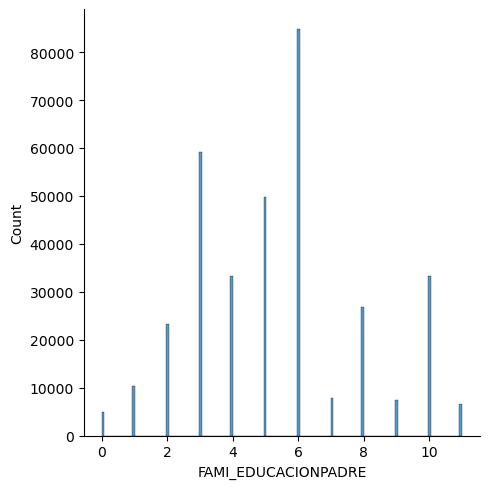

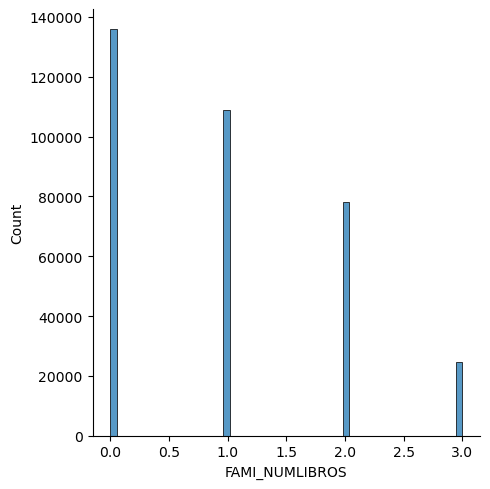

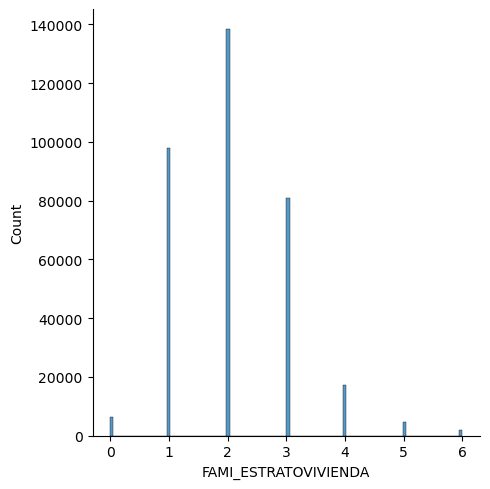

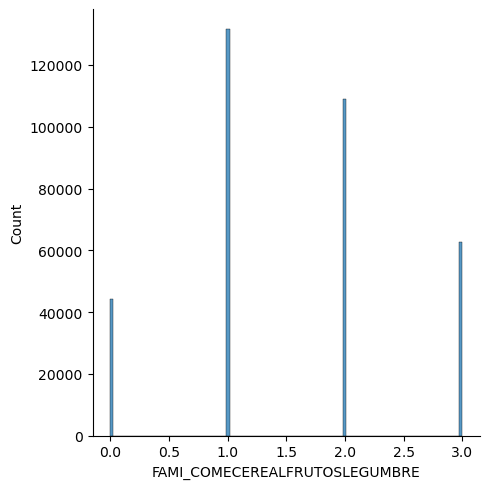

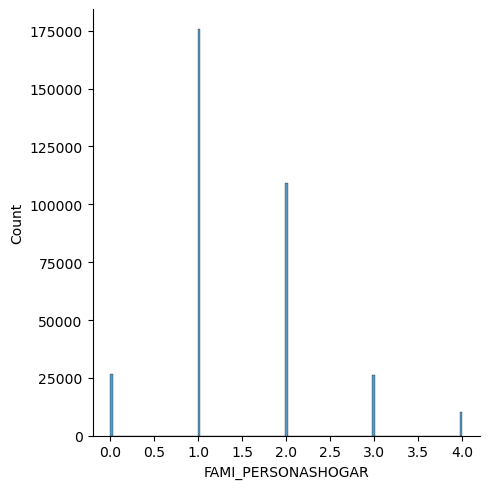

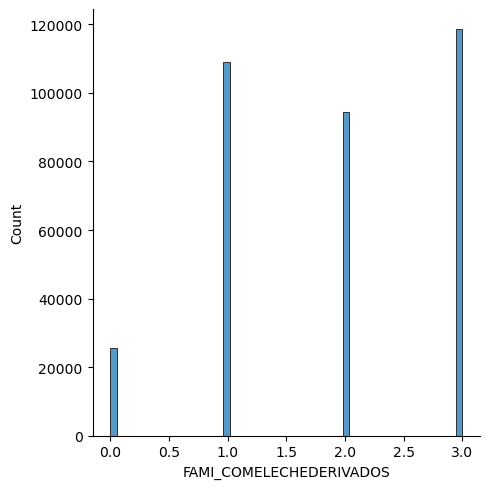

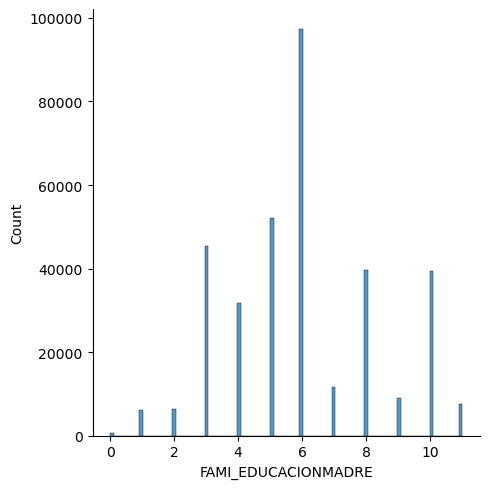

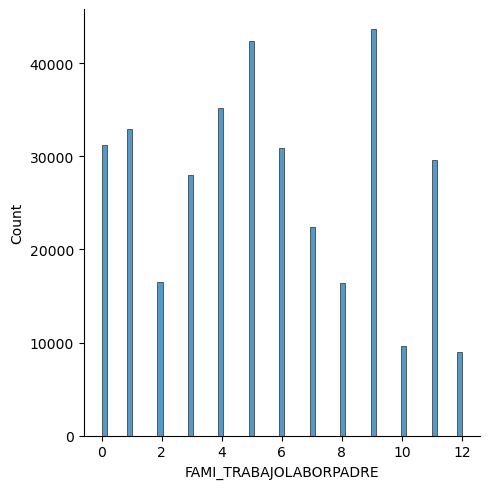

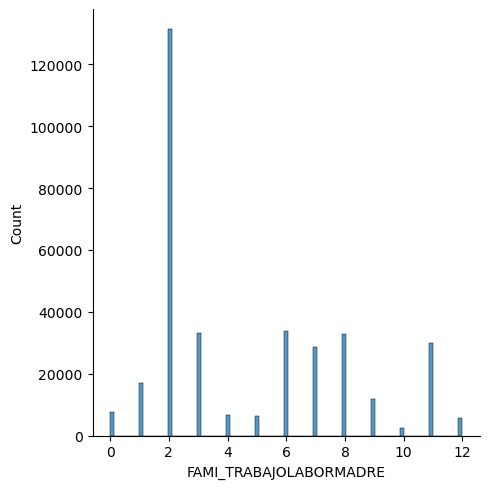

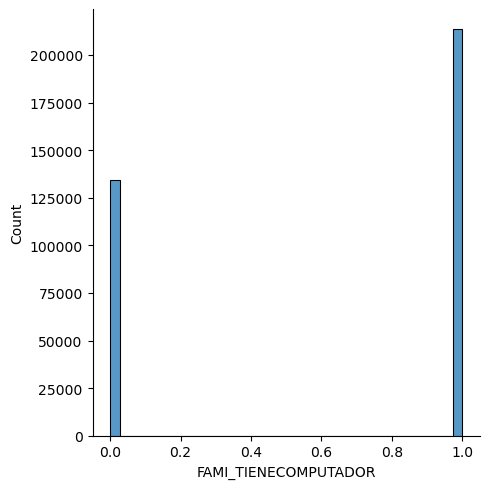

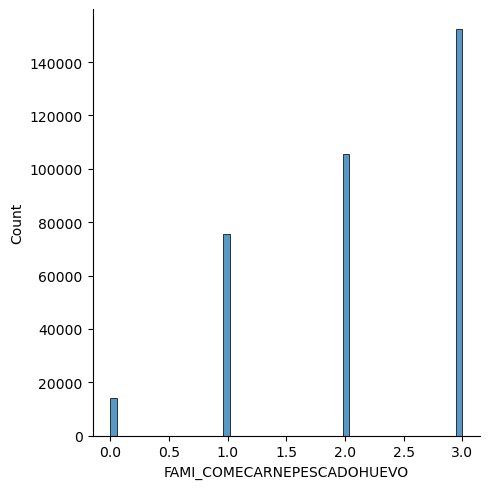

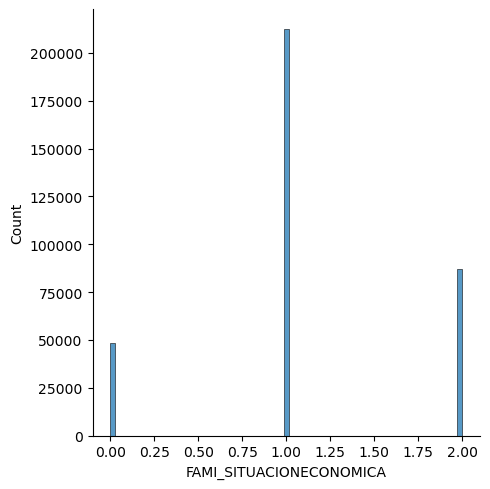

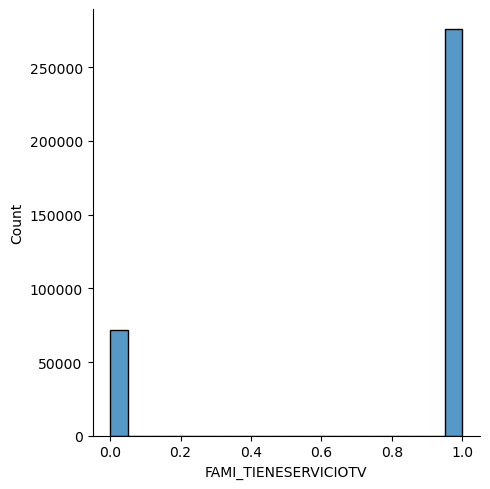

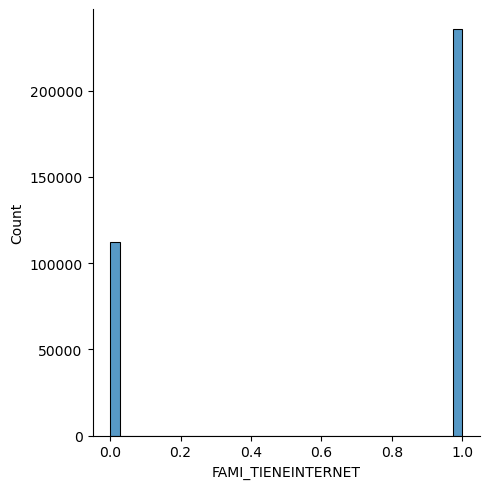

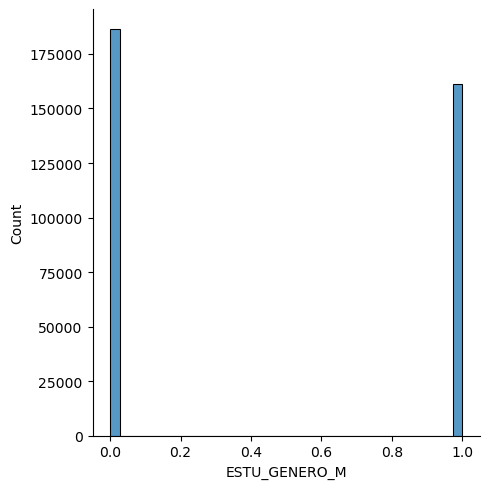

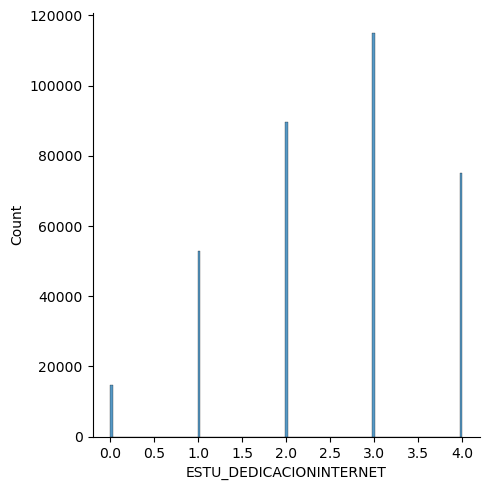

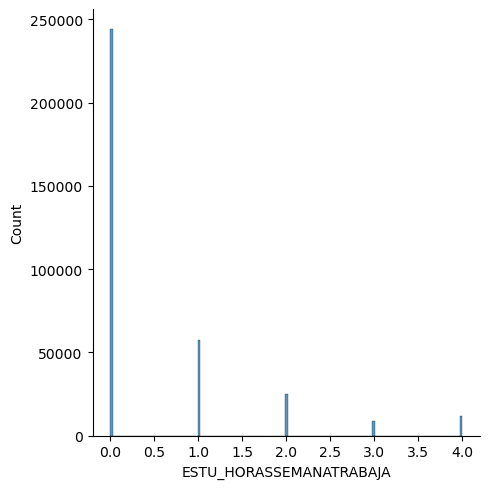

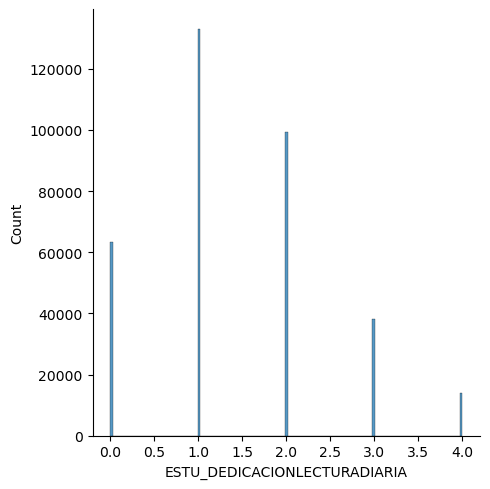

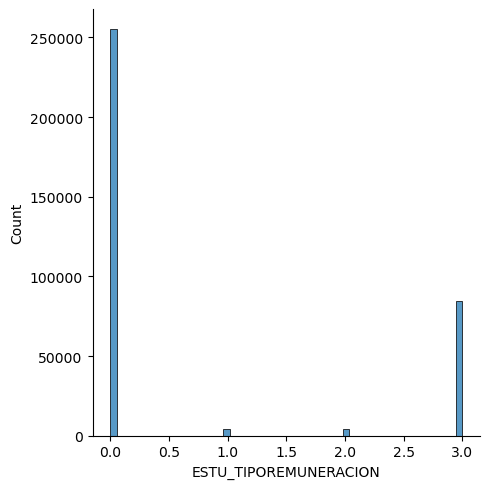

In [73]:
for i in fami_cols+estu_sin_resi_cols:
    sns.displot(data=df_encoded, x=i)